In [4]:
library(readxl)
library(dplyr)



In [5]:

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

In [6]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [11]:
library(dplyr)

In [13]:
gglopt(data = pressure, aes(x=temperature, y = pressure))+
geom_point()

ERROR: Error in gglopt(data = pressure, aes(x = temperature, y = pressure)): could not find function "gglopt"


In [15]:
install.packages("ggplot2")

also installing the dependency 'isoband'

Warning message:
"package 'ggplot2' is in use and will not be installed"

package 'isoband' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\seulki oh\AppData\Local\Temp\RtmpYj8qoR\downloaded_packages


In [21]:
library(ggplot2)

ERROR: Error: Cannot use `+.gg()` with a single argument. Did you accidentally put + on a new line?


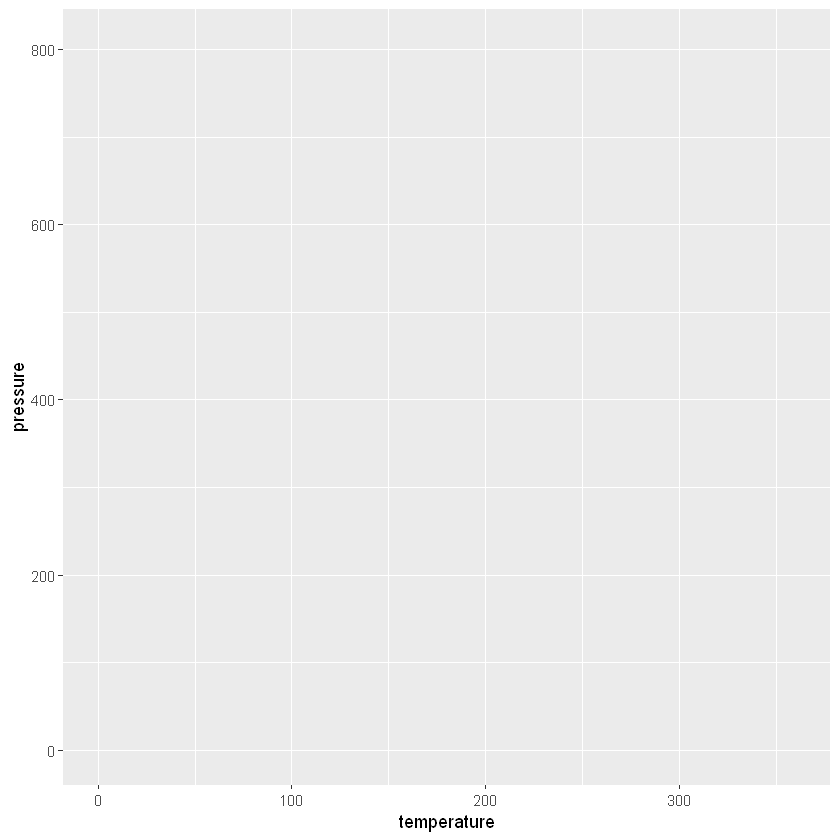

In [33]:
ggplot(data = pressure, aes(x = temperature, y = pressure))
+geom_point()

In [24]:
install.packages("readxl")

Warning message:
"package 'readxl' is in use and will not be installed"

In [25]:
install.packages("dplyr")

Warning message:
"package 'dplyr' is in use and will not be installed"

In [27]:
install.packages(ggplot)

ERROR: Error in endsWith(pkgs, ".zip"): non-character object(s)


In [28]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,<U+ACE0><U+AC1D>71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,<U+C790><U+C601><U+C5C5>,122100
W1347648,<U+ACE0><U+AC1D>72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,<U+D559><U+C0DD>,140100
W1347756,<U+ACE0><U+AC1D>73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,<U+ACE0><U+AC1D>74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,<U+C790><U+C601><U+C5C5>,130100
W1348303,<U+ACE0><U+AC1D>75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,<U+ACE0><U+AC1D>76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [29]:
install.packages("ggplot2")

Warning message:
"package 'ggplot2' is in use and will not be installed"

In [30]:
library(ggplot2)

In [31]:
library(dplyr)

In [37]:
df_cfm_order <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>% 
select(customer_id, reserv_no, visitor_cnt, cancel, order_no, item_id, sales) %>%
arrange(customer_id, reserv_no, item_id)

head(df_cfm_order)

customer_id,reserv_no,visitor_cnt,cancel,order_no,item_id,sales
W1327595,2019061801,2,N,190618107186310010,M0001,48000
W1327595,2019071801,4,N,190718107186310010,M0005,140000
W1327803,2019060301,4,N,190603578341100100,M0005,140000
W1327803,2019091506,2,N,190915137187310010,M0005,70000
W1328432,2019060601,4,N,190606607189610010,M0005,140000
W1328432,2019060601,4,N,190606607189610010,M0010,12000


In [39]:
df_sct_graph <- df_cfm_order %>% 
group_by(customer_id) %>% 
summarise(vst_cnt = sum(visitor_cnt), cust_amt = sum(sales/1000))
head(df_sct_graph)

customer_id,vst_cnt,cust_amt
W1327595,6,188
W1327803,6,210
W1328432,20,246
W1328505,20,287
W1328786,1,10
W1328985,8,178


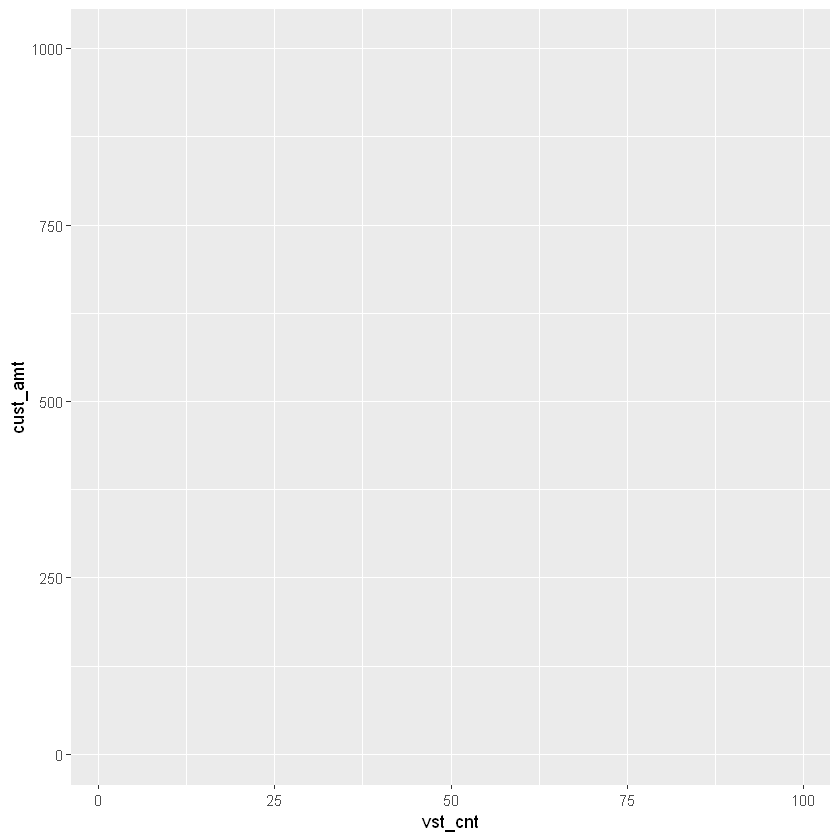

In [40]:
ggplot(data = df_sct_graph, aes(x=vst_cnt, y = cust_amt))

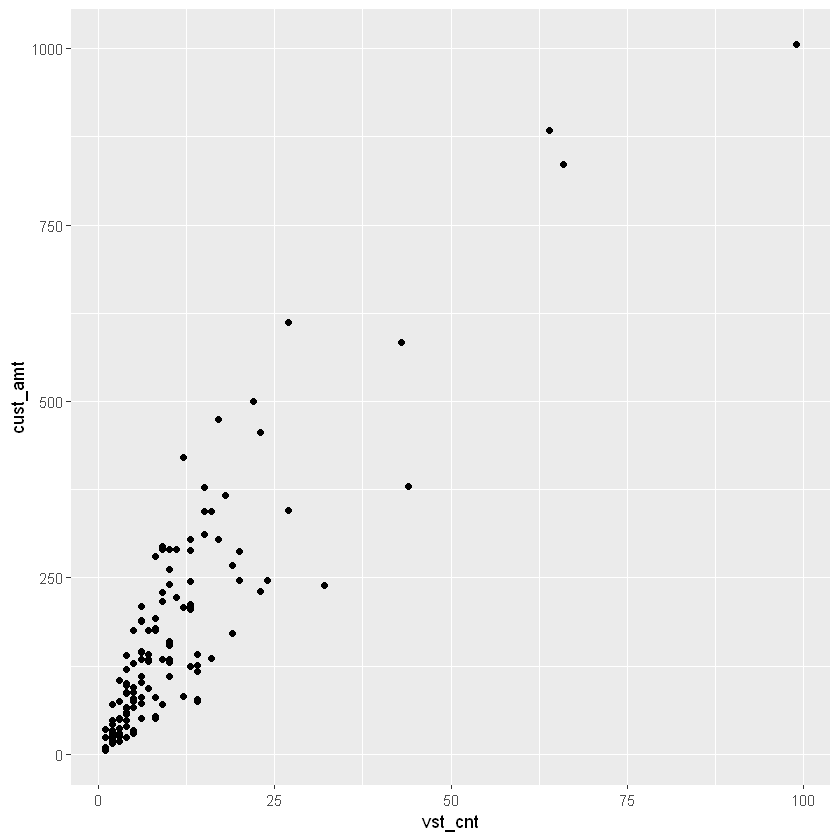

In [41]:
ggplot(data=df_sct_graph, aes(x=vst_cnt, y=cust_amt))+
geom_point()

Warning message:
"Removed 5 rows containing missing values (geom_point)."

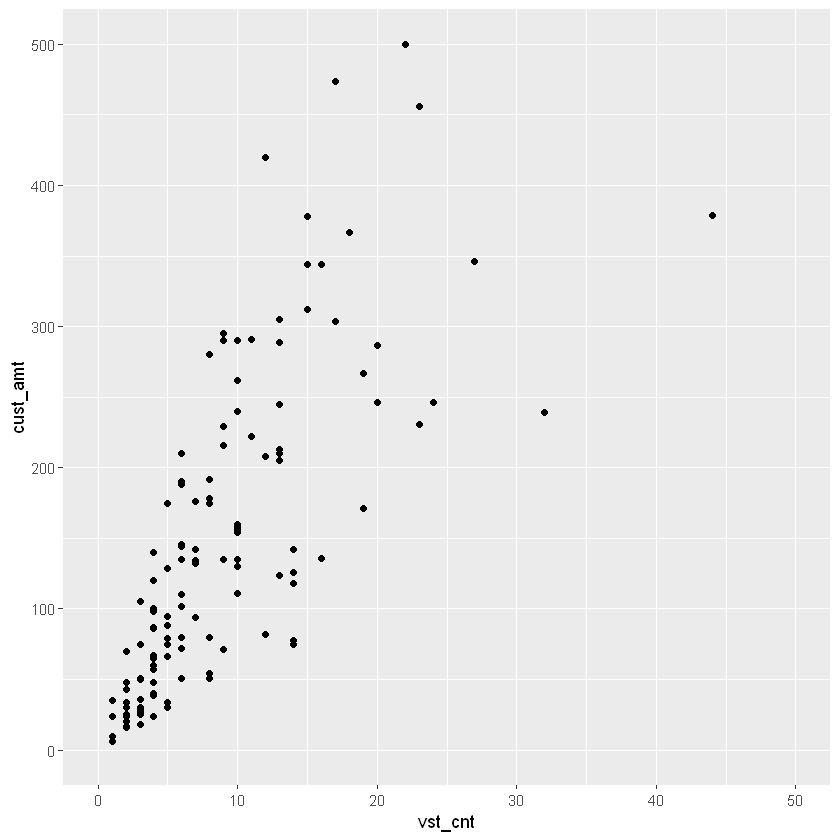

In [42]:
ggplot(data=df_sct_graph, aes(x=vst_cnt, y=cust_amt))+
geom_point()+
xlim(0,50) + ylim(0,500)

In [43]:
df_sct_graph2 <- inner_join(df_sct_graph, customer_r, by="customer_id") %>% 
select(vst_cnt, cust_amt, sex_code)

head(df_sct_graph2)

vst_cnt,cust_amt,sex_code
6,188,M
6,210,M
20,246,M
20,287,F
1,10,M
8,178,M


Warning message:
"Removed 5 rows containing missing values (geom_point)."

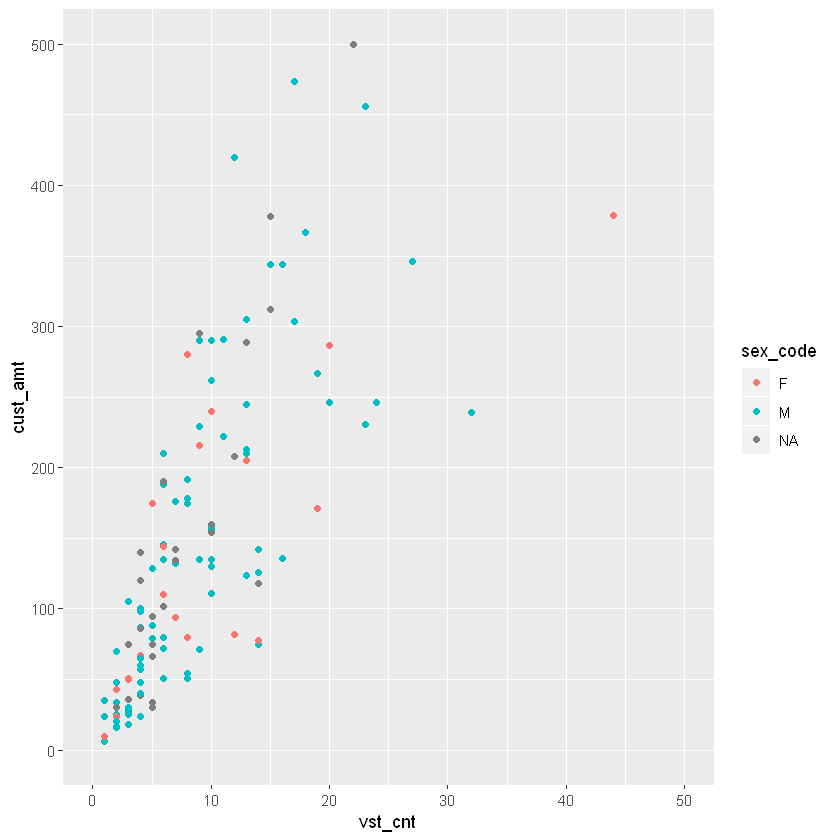

In [48]:
ggplot(data = df_sct_graph2, aes(x=vst_cnt, y=cust_amt, color=sex_code))+
geom_point()+
xlim(0,50)+
ylim(0,500)

In [49]:
df_branch_sales_1 <- inner_join(reservation_r, order_info_r, by= "reserv_no") %>% 
select(branch, sales) %>% 
arrange(branch, sales)

In [50]:
df_branch_sales_2 <- df_branch_sales_1 %>% group_by(branch) %>% 
summarise(amt=sum(sales)/1000) %>% 
arrange(desc(amt)) #내림차순으로

df_branch_sales_2

branch,amt
<U+AC15><U+B0A8>,4074
<U+C601><U+B4F1><U+D3EC>,1516
<U+C885><U+B85C>,1428
<U+C6A9><U+C0B0>,1366
<U+C11C><U+CD08>,1295
<U+C1A1><U+D30C>,1190
<U+C11C><U+B300><U+BB38>,1180
<U+B3D9><U+C791>,1149
<U+AD00><U+C545>,1101
<U+B178><U+C6D0>,1054


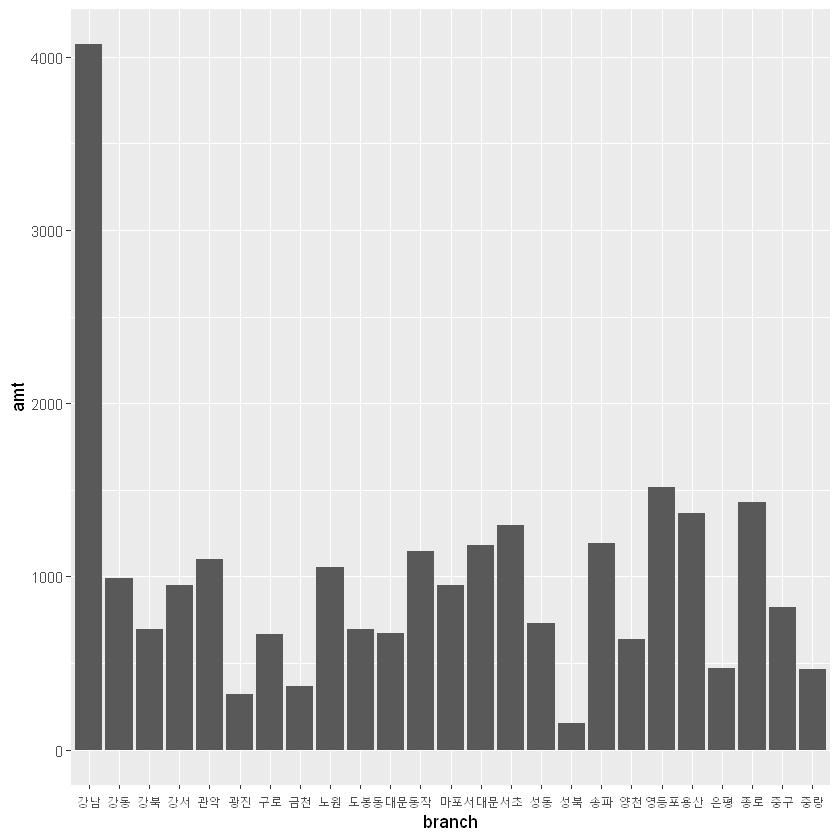

In [52]:
ggplot(df_branch_sales_2, aes(x=branch, y= amt))+ geom_bar(stat = "identity")

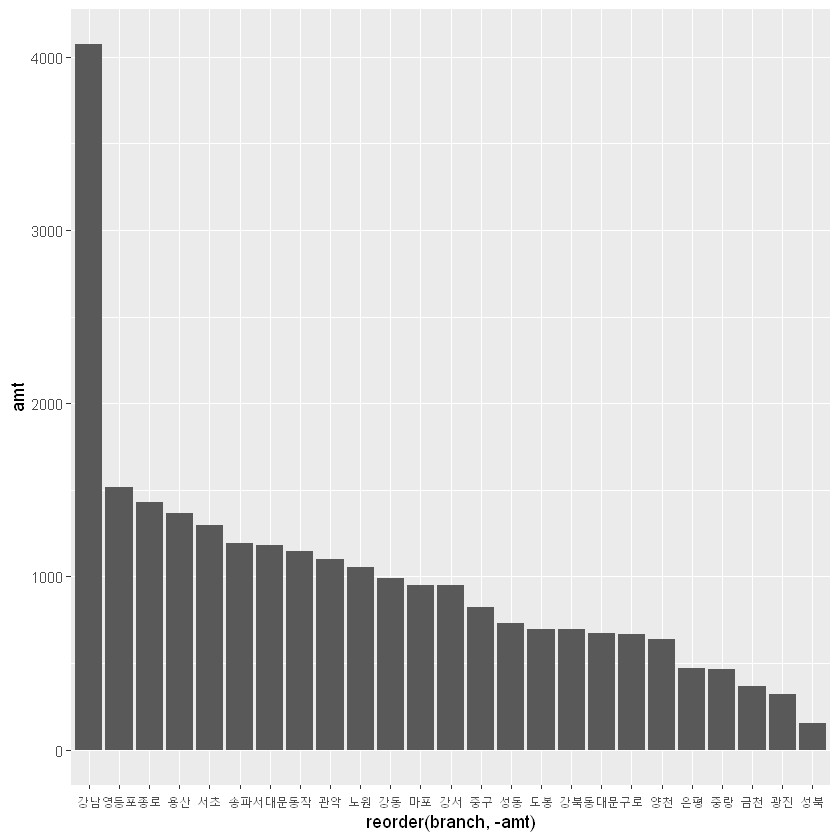

In [53]:
ggplot(df_branch_sales_2, aes(x=reorder(branch, -amt), y=amt))+
geom_bar(stat = "identity") #오름차순으로 정렬 reoder

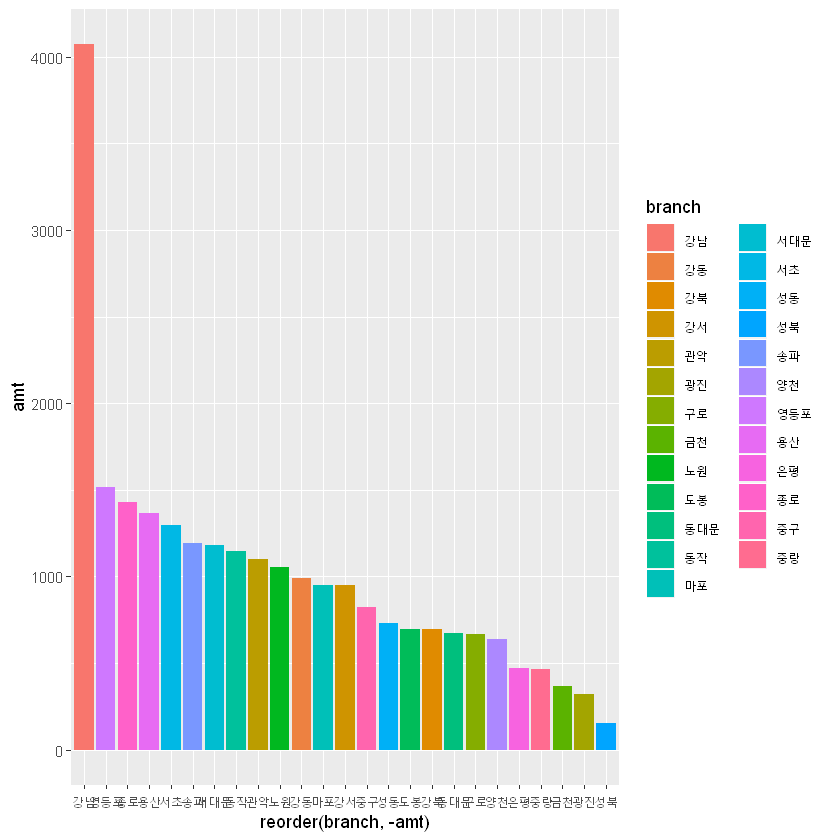

In [54]:
ggplot(df_branch_sales_2, aes(x=reorder(branch, -amt),y = amt, fill = branch))+
geom_bar(stat = "identity")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"Removed 25 rows containing missing values (position_stack)."

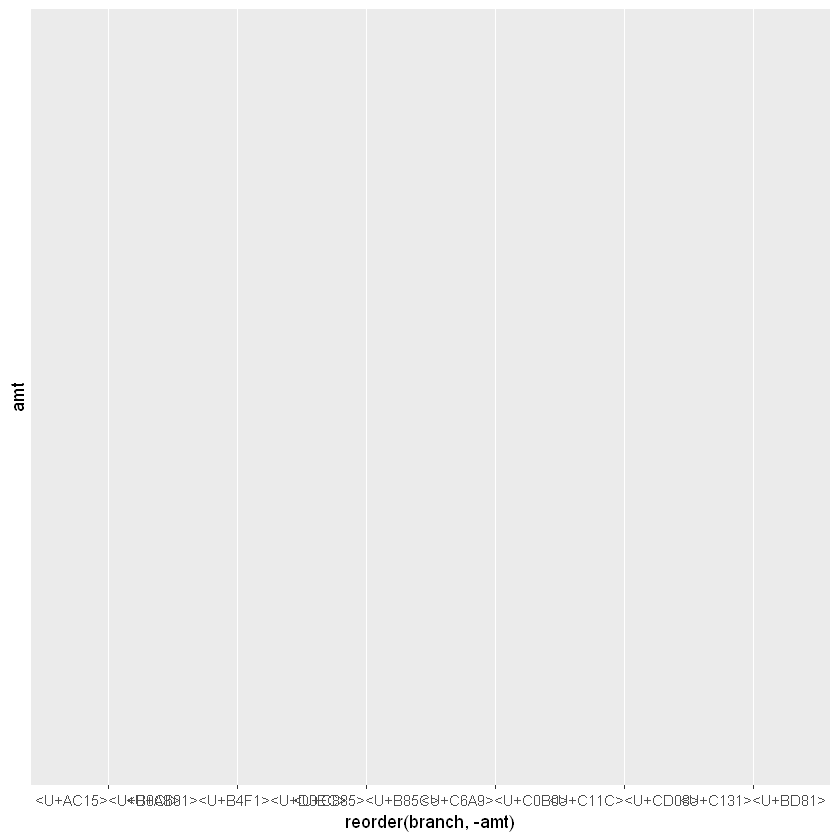

In [56]:
gg <- ggplot(df_branch_sales_2, aes(x=reorder(branch, -amt), y=amt, fill= branch))+
geom_bar(stat = "identity")+
xlim(c("강남","영등포","종로","용산","서초","성북"))

gg

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"Removed 25 rows containing missing values (position_stack)."

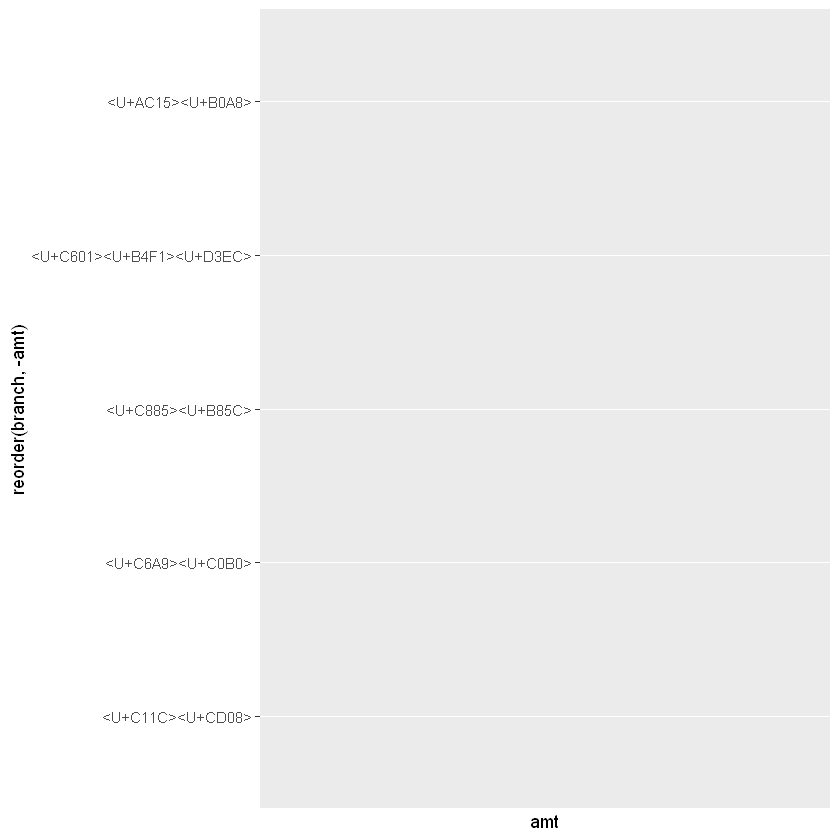

In [58]:
gg <- ggplot(df_branch_sales_2, aes(x=reorder(branch, -amt), y=amt, fill= branch))+
geom_bar(stat = "identity")+
xlim(c("서초", "용산", "종로", "영등포", "강남"))

gg <- gg+coord_flip()+
gg

Warning message:
"Removed 25 rows containing missing values (position_stack)."

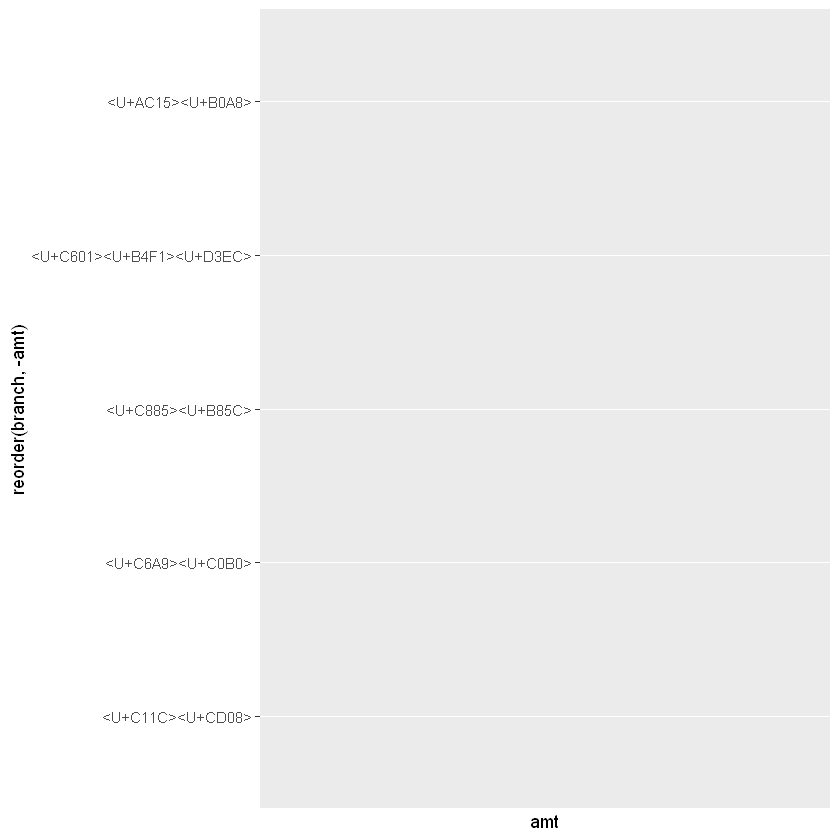

In [59]:
gg <- ggplot(df_branch_sales_2, aes(x=reorder(branch, -amt), y=amt, fill= branch))+
geom_bar(stat = "identity")+
xlim(c("서초", "용산", "종로", "영등포", "강남"))

gg <- gg+theme(legend.position = "bottom")
gg

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"Removed 25 rows containing missing values (position_stack)."

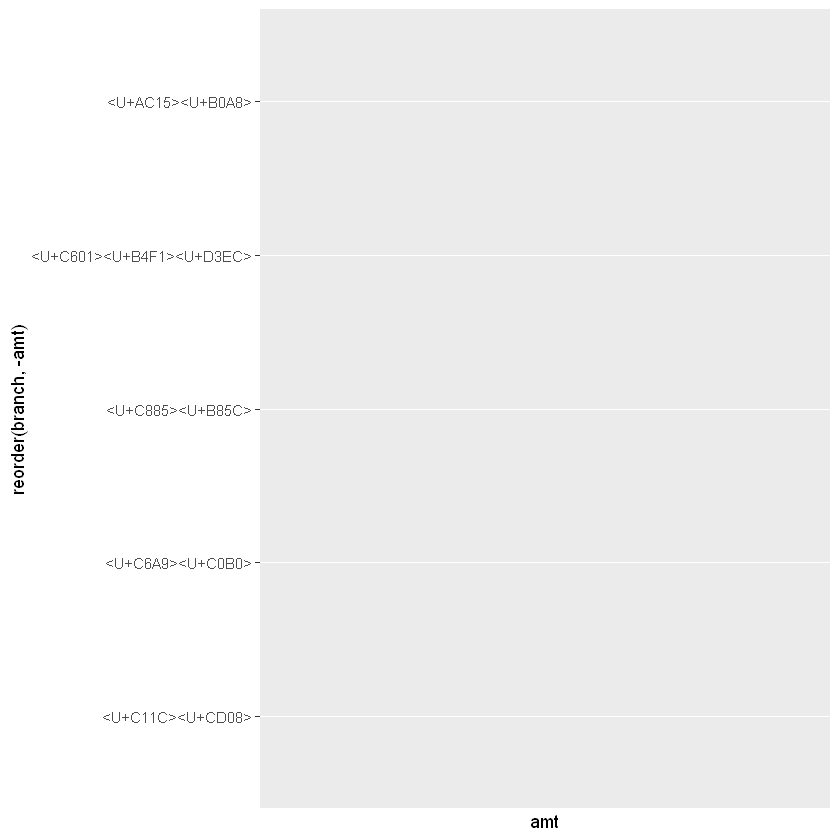

In [60]:
gg <- gg+scale_fill_discrete(breaks = c("강남","영등포","종로","용산","서초"))
gg

In [61]:
gg <- ggplot(df_branch_sales_2, aes(x=reorder(branch, -amt), y=amt, fill= branch))+
geom_bar(stat = "identity")+
xlim(c("강남","영등포","종로","용산","서초"))

gg <- gg+coord_flip()+
them(legend.position = "bottom")+
scale_fill_discreate(breaks = c("강남","영등포","종로","용산","서초"))

gg

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

ERROR: Error in them(legend.position = "bottom"): could not find function "them"


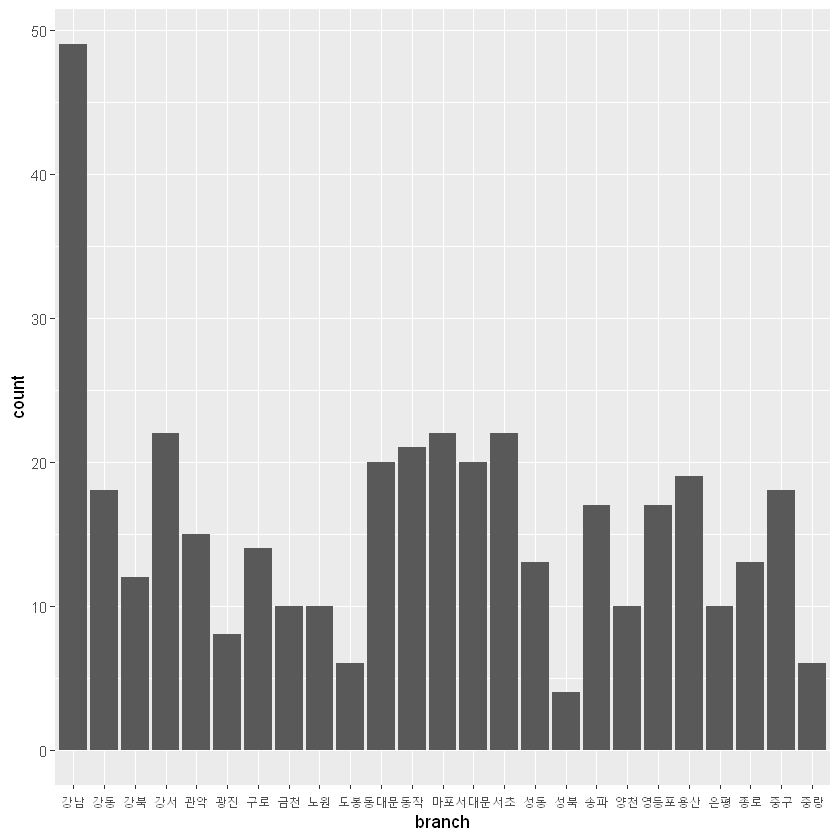

In [62]:
gg <- ggplot(data = reservation_r, aes(x=branch))+geom_bar(stat="count")
gg

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

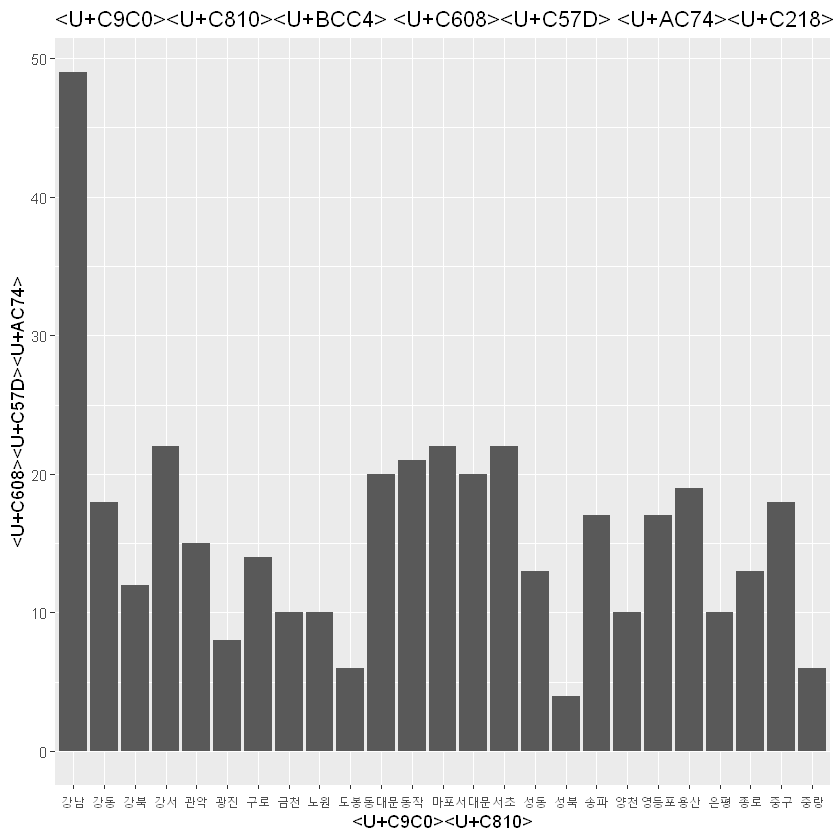

In [63]:
gg <- gg+labs(title="지점별 예약 건수", x="지점", y="예약건")
gg

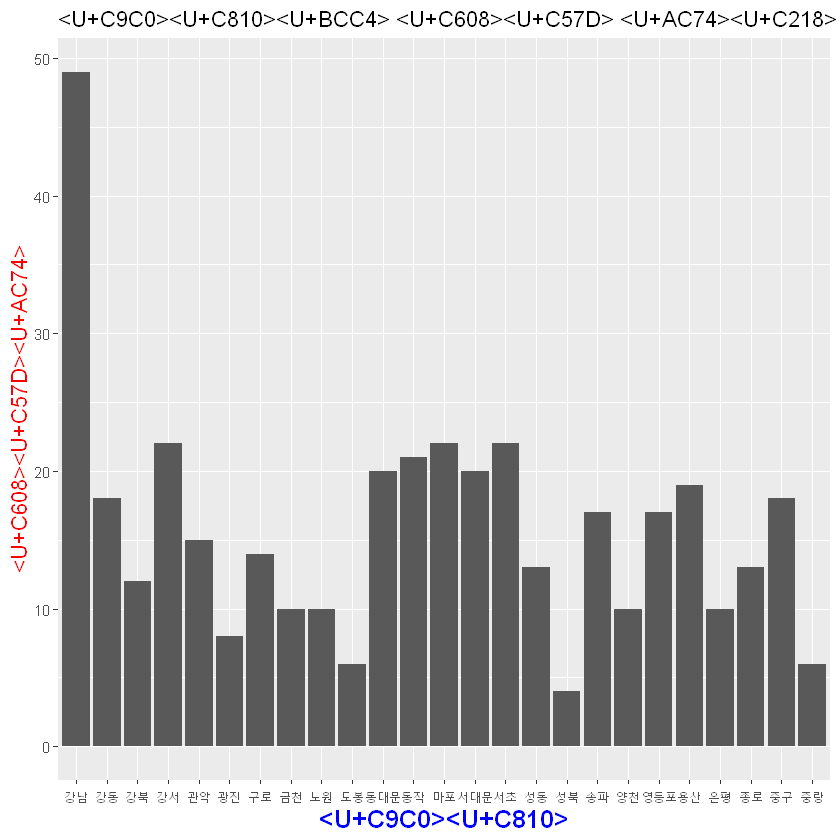

In [65]:
gg <- gg+theme(axis.title.x = element_text(size = 15,
                                          color = "blue",
                                          face = 'bold',
                                          angle = 0),
              axis.title.y = element_text(size = 13,
                                         color = "red",
                                         angle = 90))
gg

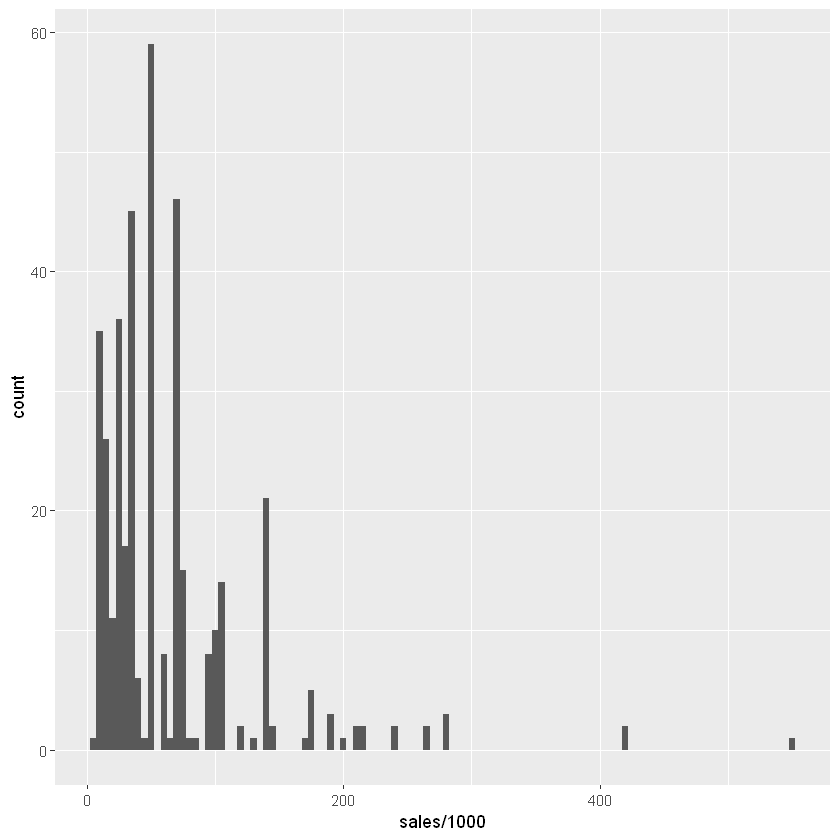

In [66]:
ggplot(data = order_info_r, aes(x = sales/1000)) + geom_histogram(binwidth = 5)

In [67]:
df_pie_graph <- inner_join(order_info_r, item_r, by = "item_id") %>% 
group_by(item_id, product_name) %>% 
summarise(amt_item = sum(sales/1000)) %>% 
select(item_id, amt_item, product_name)

df_pie_graph

`summarise()` has grouped output by 'item_id'. You can override using the `.groups` argument.


item_id,amt_item,product_name
M0001,5808,SPECIAL_SET
M0002,1968,PASTA
M0003,1666,PIZZA
M0004,1625,SEA_FOOD
M0005,9380,STEAK
M0006,2075,SALAD_BAR
M0007,525,SALAD
M0008,610,SANDWICH
M0009,856,WINE
M0010,444,JUICE


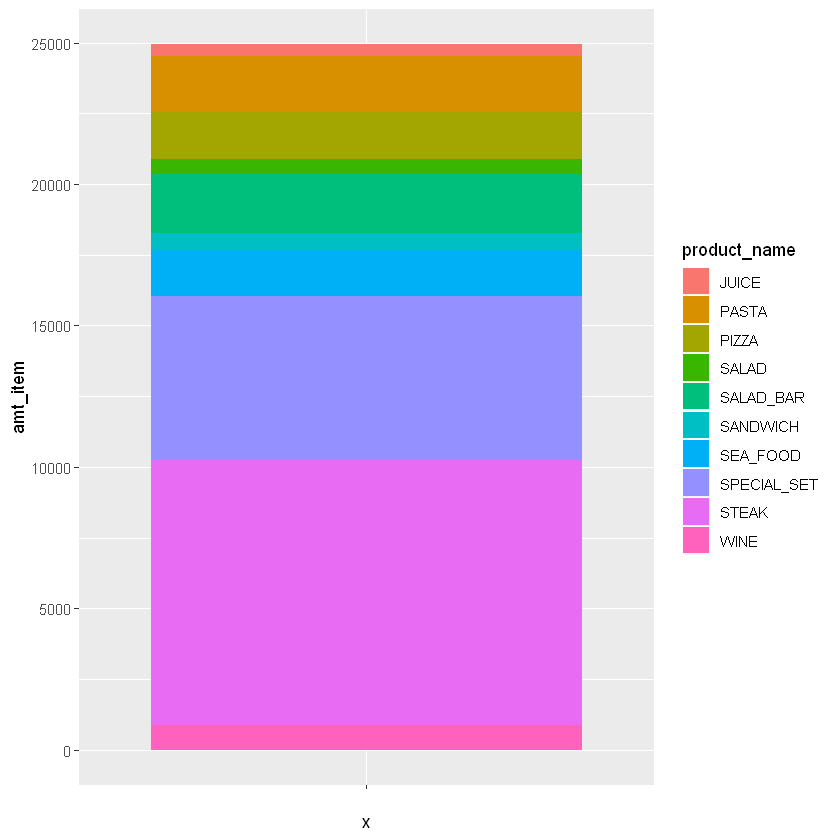

In [74]:
ggplot(df_pie_graph, aes(x="", y=amt_item, fill = product_name))+
geom_bar(stat = "identity")

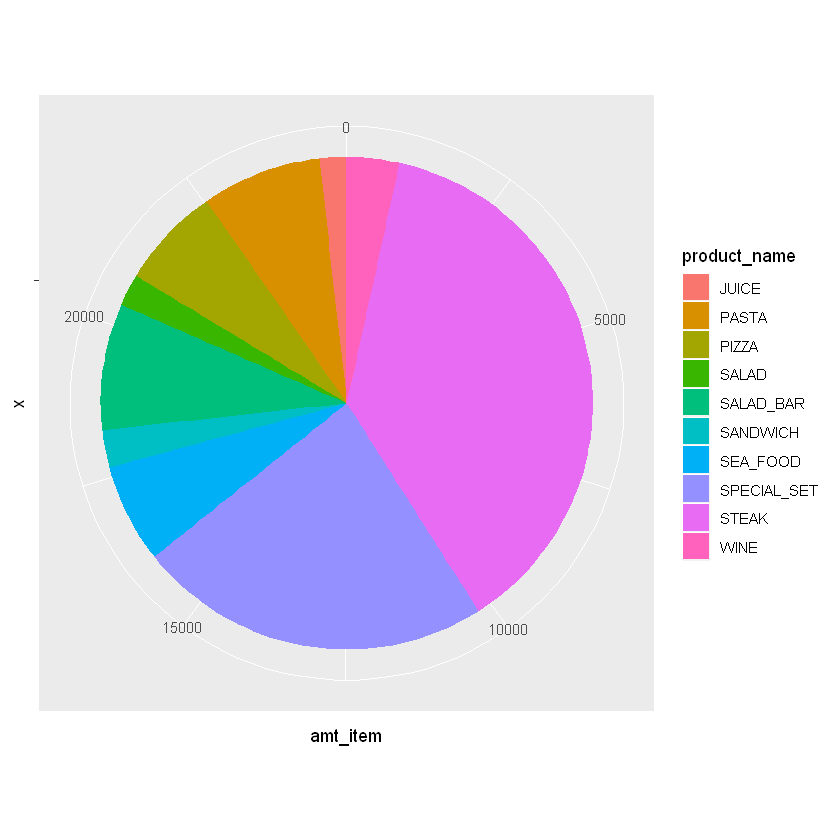

In [76]:
gg <- ggplot(df_pie_graph, aes(x="", y=amt_item, fill = product_name))+
geom_bar(stat = "identity")+
coord_polar("y", start = 0)

gg

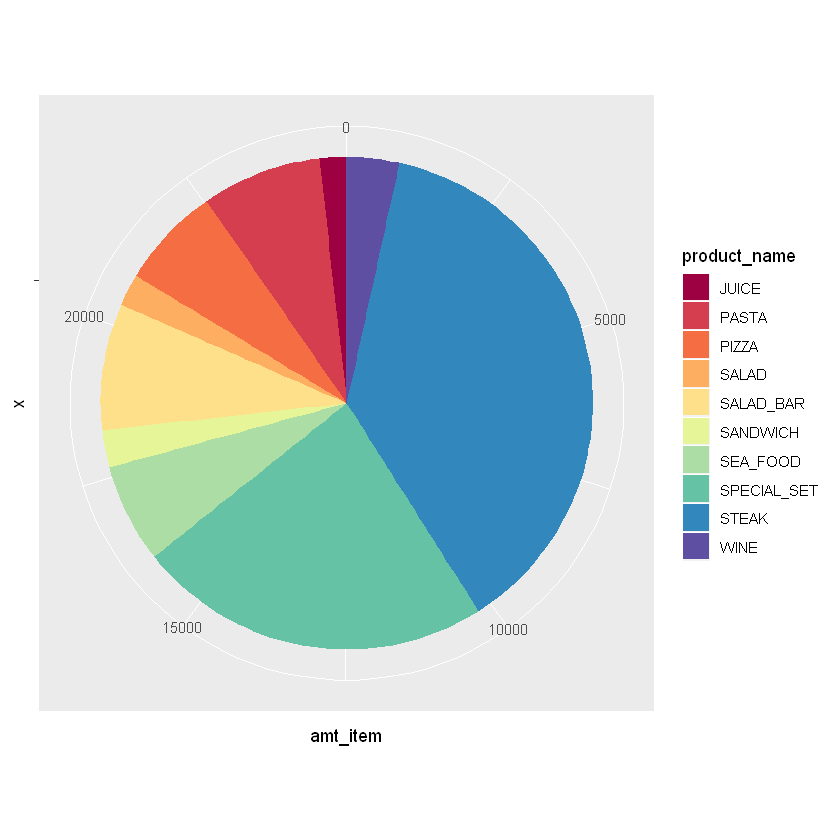

In [77]:
gg <- gg+scale_fill_brewer(palette = "Spectral")
gg

In [78]:
library(RColorBrewer)

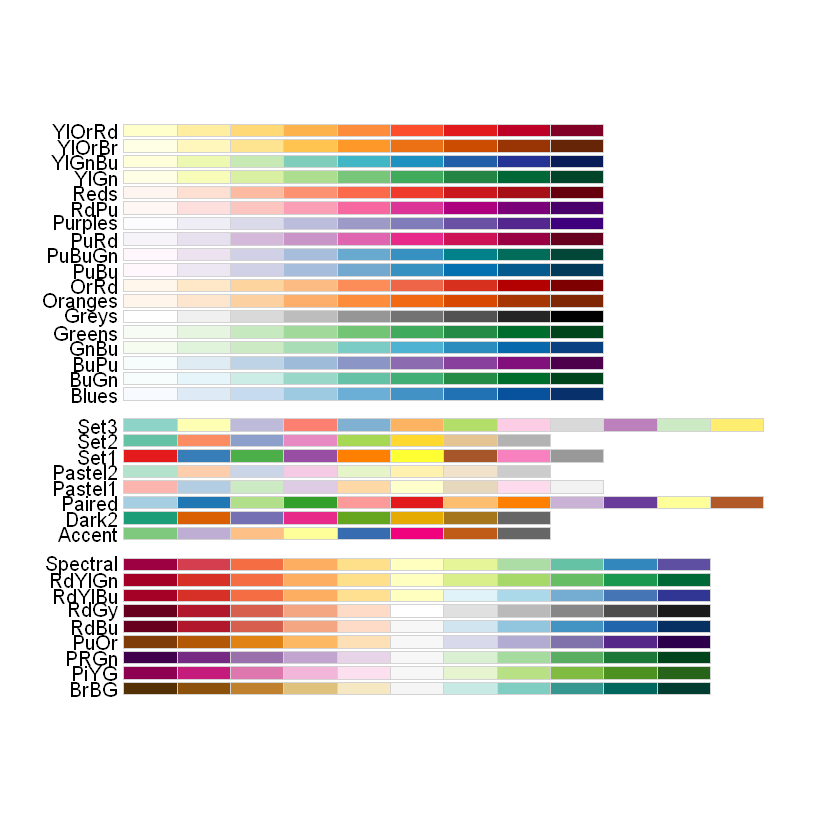

In [80]:
display.brewer.all()

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Oranges is 9
Returning the palette you asked for with that many colors
"

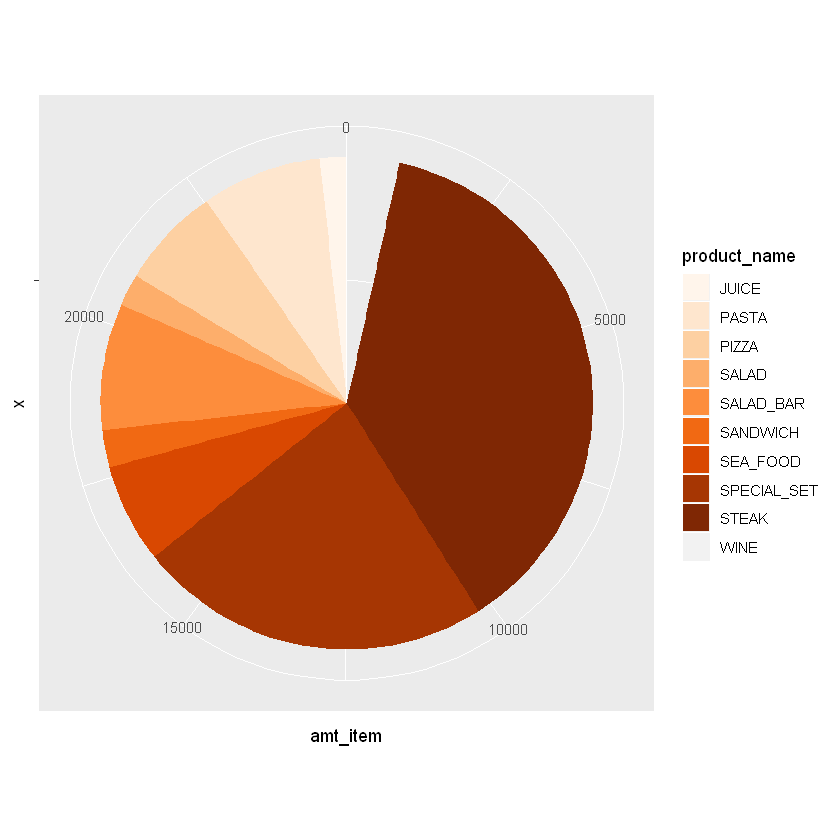

In [82]:
gg <- gg+scale_fill_brewer(palette = "Oranges")
gg